## Exo 3

### Libraries importation

We import librairies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn import metrics
from sklearn import datasets
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import discriminant_analysis
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patheffects as PathEffects

#color map used to display the different classes with a different color
cmap = colors.ListedColormap(['r','g','b','c','m','y'])

### Data importation

We load data

In [ ]:
data = np.load("data_1.npy")
data = pd.DataFrame(data)
data.head(5)

,0,1,2,3
0,662.261577,54.395542,-20.588774,-37.700650
1,511.089192,-11.032335,12.517693,-42.685584
2,706.603381,-1.482359,38.623507,32.249615
3,649.026483,-18.999846,33.095142,-23.827027
4,666.521711,84.331183,-32.254653,138.898554


### Dimension reduction

The goal here is to create our first metric using the principal component analysis.
We chose to reduce from 4 to 3 dimensions
<br><br><br>
We see that the first 3 dimensions are the most importants


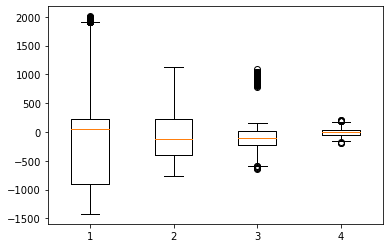

In [ ]:
pca = decomposition.PCA()
components_pca = pca.fit(data).transform(data)
plt.boxplot(components_pca)
plt.show()

### PCA Visualisation
We plot our datas in the new dimensions
<br><br><br>
This visualisation of our data allows us to see clearly 6 clusters, we will assume for now that there are 6 clusters and we will use various metrics to verify our hypothesis later.

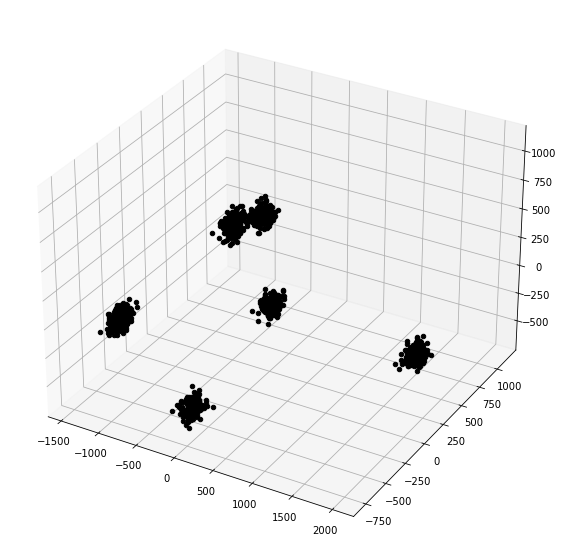

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
for i, j, k in zip(components_pca[:,0], components_pca[:,1], components_pca[:,2]):
    ax.scatter(i, j, k, color = 'black')
plt.show()

### Kmean Clustering

Using the Kmean method we label each of our clusters, this will allow us to run a Linear discriminant analysis.
We will next be using this Linear discriminant analysis as our second metric.

In [ ]:
clustering = KMeans(n_clusters=6)
clustering.fit(data)
classes = clustering.labels_

In [ ]:
lda = discriminant_analysis.LinearDiscriminantAnalysis()
components_lda = lda.fit(data,classes).transform(data)

### LDA Visualisation

The LDA is a PCA of the barycenters of the classes providing the space of the individuals with a specific metric called *Mahalanobis*. This metric is defined by the inverse of the intraclass covariance matrix. The objective is then to visualize the capacities of the variables to discriminate the classes.
<br><br><br>
We can confirm that we have 6 custers


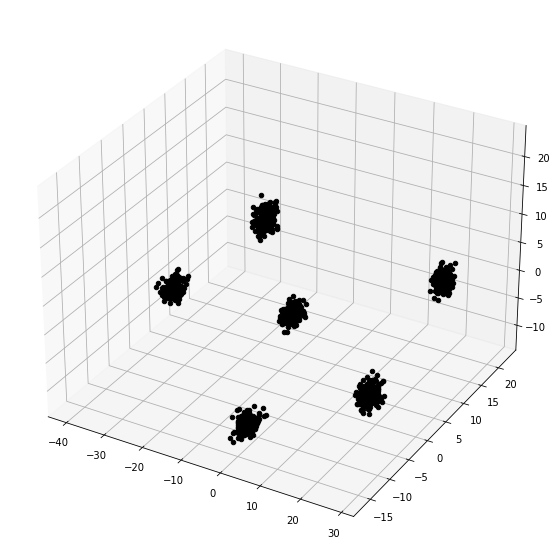

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
for i, j, k in zip(components_lda[:,0], components_lda[:,1], components_lda[:,2]):
    ax.scatter(i, j, k, color = 'black')
plt.show()

### Kmean Clustering with PCA Metric

We use kmean to display the cluster in different colors to see them better
<br><br><br>
Here again we see 6 clusters

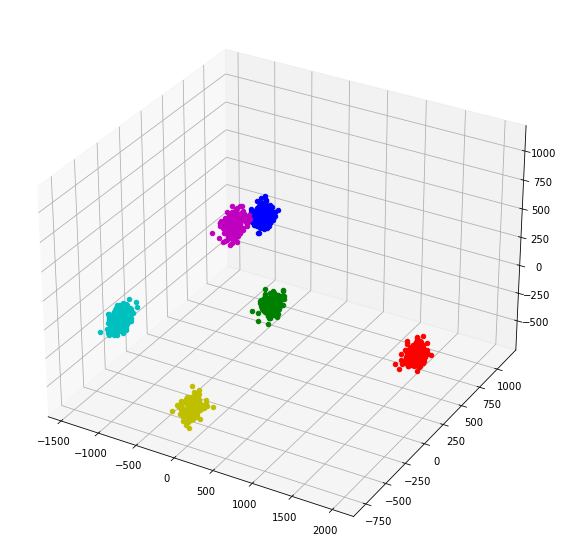

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
for i, j, k , classe in zip(components_pca[:,0], components_pca[:,1], components_pca[:,2], classes):
    ax.scatter(i, j, k, color = cmap(classe))
plt.show()

### Kmean Clustering with LDA Metric

Same thing but with the LDA metric to separate them

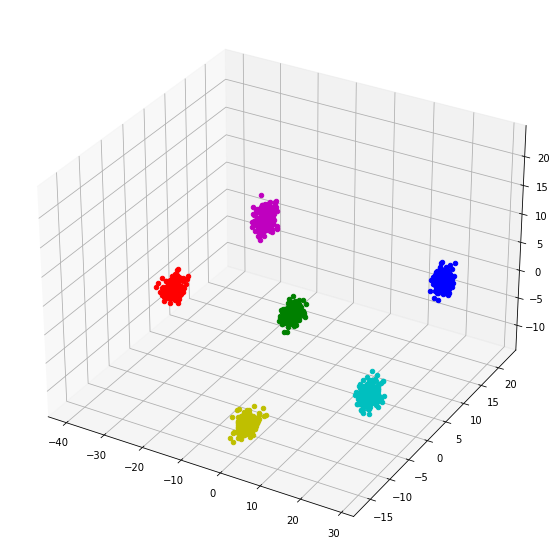

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
for i, j, k , classe in zip(components_lda[:,0], components_lda[:,1], components_lda[:,2], classes):
    ax.scatter(i, j, k, color = cmap(classe))
plt.show()

### Kmean Heuristic

Using various metric we can conclude that our hypothesis of 6 cluster seems to be right.

In [ ]:
print("Silhouette Coefficient (close to 1 is better) : " + str(metrics.silhouette_score(data, classes)))
print("Calinski-Harabasz Index (higher is better) : " + str(metrics.calinski_harabasz_score(data, classes)))
print("Davies-Bouldin Index (lower is better) : " + str(metrics.davies_bouldin_score(data, classes)))

Silhouette Coefficient (close to 1 is better) : 0.887139316265711
Calinski-Harabasz Index (higher is better) : 36862.8124428709
Davies-Bouldin Index (lower is better) : 0.1573563432964347


### MeanShift Clustering

We now use Meanshift instead of Kmean methode

In [ ]:
ms = MeanShift(bandwidth=estimate_bandwidth(data, quantile=0.1, n_samples=500), bin_seeding=True)
ms.fit(data)
classes = ms.labels_

### MeanShift Clustering with PCA Metric


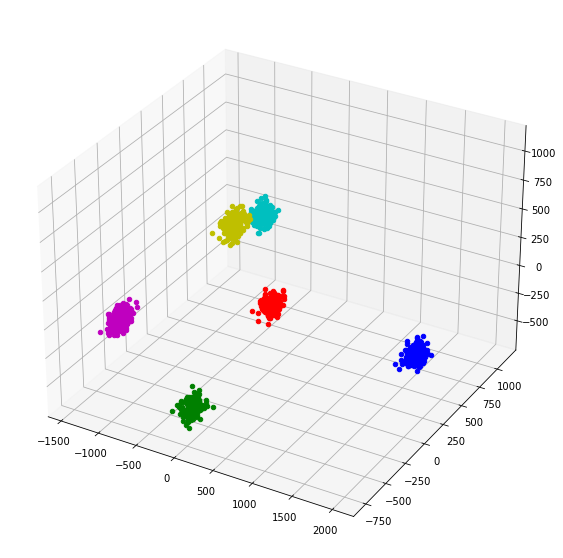

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
for i, j, k , classe in zip(components_pca[:,0], components_pca[:,1], components_pca[:,2], classes):
    ax.scatter(i, j, k, color = cmap(classe))
plt.show()

### MeanShift Clustering with LDA Metric

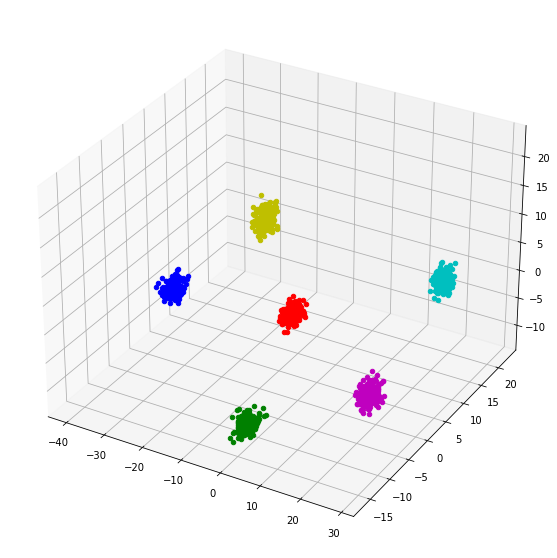

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
for i, j, k , classe in zip(components_lda[:,0], components_lda[:,1], components_lda[:,2], classes):
    ax.scatter(i, j, k, color = cmap(classe))
plt.show()

### MeanShift Heuristic

Using various metric we can conclude that our hypothesis of 6 cluster seems to be right.

In [ ]:
print("Silhouette Coefficient (close to 1 is better) : " + str(metrics.silhouette_score(data, classes)))
print("Calinski-Harabasz Index (higher is better) : " + str(metrics.calinski_harabasz_score(data, classes)))
print("Davies-Bouldin Index (lower is better) : " + str(metrics.davies_bouldin_score(data, classes)))

Silhouette Coefficient (close to 1 is better) : 0.887139316265711
Calinski-Harabasz Index (higher is better) : 36862.8124428709
Davies-Bouldin Index (lower is better) : 0.1573563432964347


### Conclusion

In our case, the different classes are already somewhat far apart, which allows our different methods to differentiate them with ease. 
However, the malahanobis metric seems to be better suited to separate the different clusters.